
# CS 4501 Algorithmic Economics - Project 2

Bohan Wang, Arran Scaife and Matthew Whelan

### Task I: Uncoupled No-Regret Learning Dynamics under Full Information

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

Our implementation of the Multiplicative Weight Update Algorithm - some parts adapted from the TA's Project 2 Recording. 

Normalize the weight matrix and generate the cost vector by multiplying the payoff matrix by the Opponent's strategy matrix. This is possible under Full Information setup where the opponent's information is available to a player. Then, we update the weight matrix by multiplying it by 1 - epsilon*cost matrix.

In [ ]:

# ------- Multiplicative Weight Update Algorithm -------#
def MWU(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (you may use any data struct):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """

    M_a_copy = M_a
    M_a_copy_min = M_a_copy.min()
    M_a_copy_max = M_a_copy.max()
    M_b_copy = M_b
    M_b_copy_max = M_b_copy.max()
    M_b_copy_min = M_b_copy.min()

    for iy, ix in np.ndindex(M_a_copy.shape):
      M_a_copy[iy, ix] += -M_a_copy_min
    #print(M_a_copy)

    normalization_a = (M_a_copy_max - M_a_copy_min)
    M_a_copy = M_a_copy*(1/normalization_a)
    #print(M_a_copy)

    normalization_b = (M_b_copy_max - M_b_copy_min)
    for iy, ix in np.ndindex(M_b_copy.shape):
      M_b_copy[iy, ix] += -M_b_copy_min
    
    M_b_copy = M_b_copy*(1/normalization_b)
    
    # The number of strategies
    k = M_a.shape[0]

    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.array([random.uniform(0, 1) for _ in range(k)])
    w_b = np.array([random.uniform(0, 1) for _ in range(k)])
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = [],[],[],[]
    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0
    
    # The game starts
    for t in range(T):

        strategy_b = w_b / np.sum(w_b)
        strategy_a = w_a / np.sum(w_a)

        sum_p_a += 1
        sum_p_b += 1

        #we define this as the probability that the chosen player plays "Heads"
        last_conv_a.append(strategy_a[0])
        last_conv_b.append(strategy_b[0])

        avg_conv_a.append(sum(last_conv_a)/len(last_conv_a))
        avg_conv_b.append(sum(last_conv_b)/len(last_conv_b))

        
        # ---------- Fill out the details --------------# 
        # Simple matrix operations can be used here

        cost_a = np.matmul(M_a, strategy_b)
        cost_b = np.matmul(np.transpose(M_b), strategy_a)
        
        #Normalization of cost vector
        cost_a = (cost_a + -M_a.min() *np.ones((k, )) )/(-M_a.min() + M_a.max())
        #print(cost_a)
        cost_b = (cost_b + -M_b.min() * np.ones((k, )) )/(-M_b.min() + M_b.max())
        #print(cost_b)

        #Update weight
        # Compute epsilon
        epsilon = compute_epsilon(t)
        w_a = np.multiply(w_a, 1-epsilon*cost_a)
        w_b = np.multiply(w_b, 1-epsilon*cost_b)
        #print(w_a)
        #print(w_b)


    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

#### Question (a) - Pennies game

In [ ]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])


In [ ]:
#From TA Project 2 Tutorial:
time = list(range(1,3001))
def plotting(average_a, average_b, latest_a, latest_b):
  figure, axis = plt.subplots(1,2,figsize=(15,5))

  axis[0].plot(time, average_a, label="Player A", color="red")
  axis[0].plot(time, average_b, label="Player B", color="blue")
  axis[0].legend(loc='upper left', prop={'size':9})
  axis[0].set_title("Average convergence")

  axis[1].plot(time, latest_a, label="Player A", color="red")
  axis[1].plot(time, latest_b, label="Player B", color="blue")
  axis[1].legend(loc='upper left', prop={'size':9})
  axis[1].set_title("Last-iterate convergence")


**Choice 1: epsilon = 1/2**

We notice that this generally converges to 1/2.

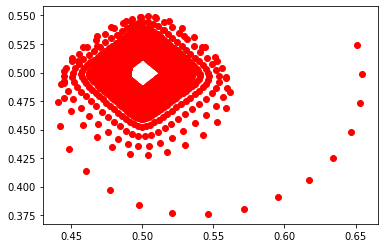

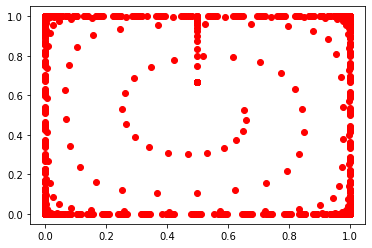

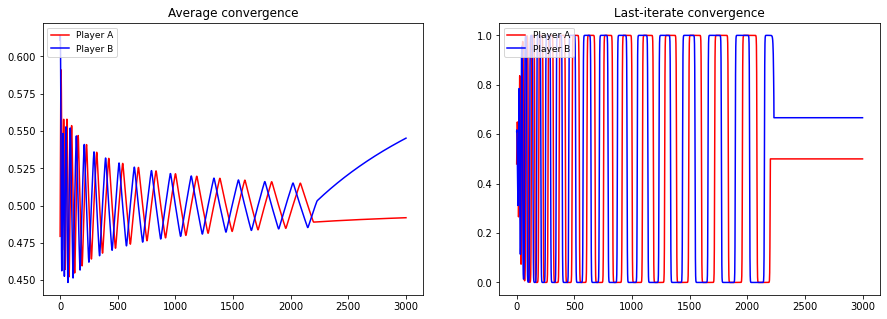

In [ ]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = (MWU(M_a, M_b, compute_epsilon, T = 3000))
#print(one_avg_conv_a)
#print(one_avg_conv_b)
#print(one_last_conv_a)
#print(one_last_conv_b)

#This plot represents the avg probability that the players choose "Heads"
plt.figure()
plt.plot(avg_conv_a, avg_conv_b, 'ro')


#This plot represents the probabiltiy, at each iteration, that a person picks "Heads"
plt.figure()
plt.plot(last_conv_a, last_conv_b, 'ro')

plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))

**Choice 2: epsilon = 1/t**

This often doesn't lead to any convergence.

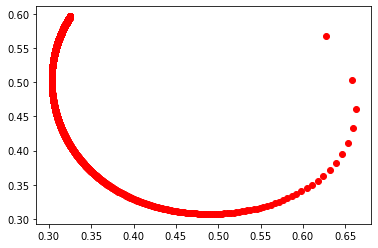

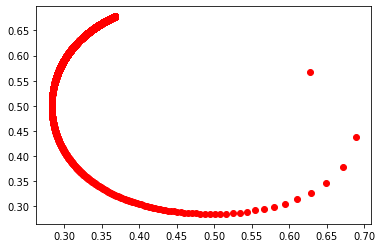

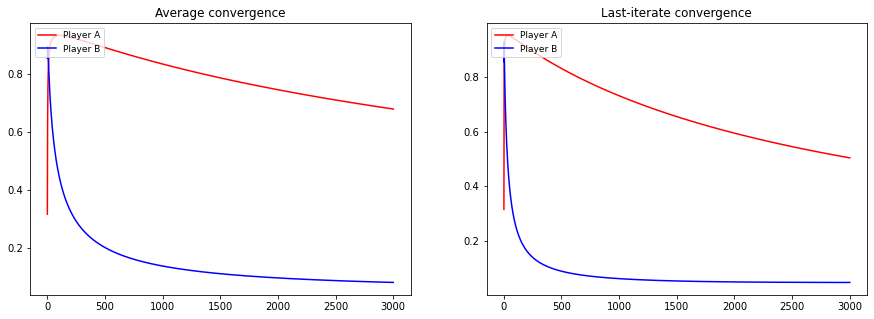

In [ ]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = (MWU(M_a, M_b, compute_epsilon, T = 3000))
#print(one_avg_conv_a)
#print(one_avg_conv_b)
#print(one_last_conv_a)
#print(one_last_conv_b)

#This plot represents the avg probability that the players choose "Heads"
plt.figure()
plt.plot(avg_conv_a, avg_conv_b, 'ro')


#This plot represents the probabiltiy, at each iteration, that a person picks "Heads"
plt.figure()
plt.plot(last_conv_a, last_conv_b, 'ro')

plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))

**Choice 3: epsilon = 1/(t^2/3)**

This converges around 1/2

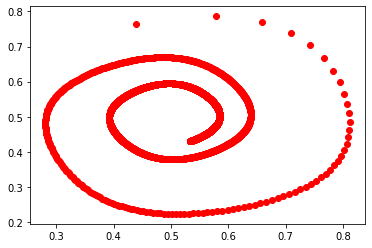

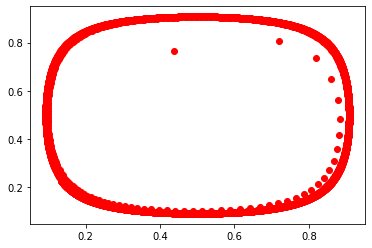

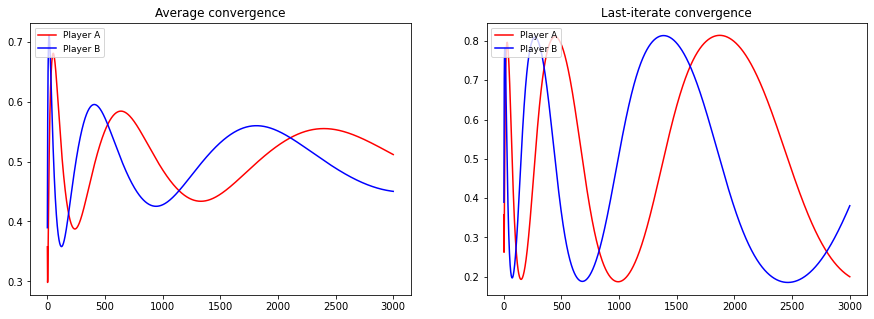

In [ ]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = (MWU(M_a, M_b, compute_epsilon, T = 3000))
#print(one_avg_conv_a)
#print(one_avg_conv_b)
#print(one_last_conv_a)
#print(one_last_conv_b)

#This plot represents the avg probability that the players choose "Heads"
plt.figure()
plt.plot(avg_conv_a, avg_conv_b, 'ro')


#This plot represents the probabiltiy, at each iteration, that a person picks "Heads"
plt.figure()
plt.plot(last_conv_a, last_conv_b, 'ro')

plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))

**Choice 4: 1/sqrt(t)**

This converges around 1/2.

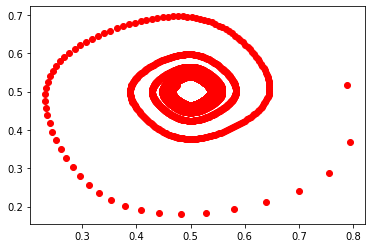

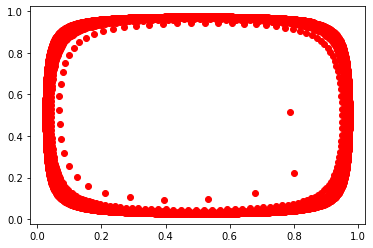

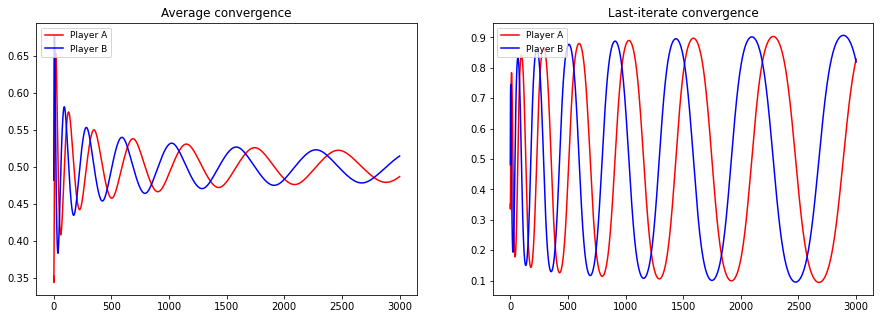

In [ ]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = (MWU(M_a, M_b, compute_epsilon, T = 3000))
#print(one_avg_conv_a)
#print(one_avg_conv_b)
#print(one_last_conv_a)
#print(one_last_conv_b)

#This plot represents the avg probability that the players choose "Heads"
plt.figure()
plt.plot(avg_conv_a, avg_conv_b, 'ro')


#This plot represents the probabiltiy, at each iteration, that a person picks "Heads"
plt.figure()
plt.plot(last_conv_a, last_conv_b, 'ro')

plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))

**Choice 5: epsilon = 1/(t^(1/3))**

This converges to 1/2.

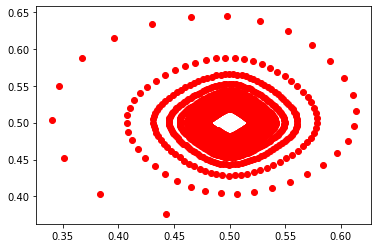

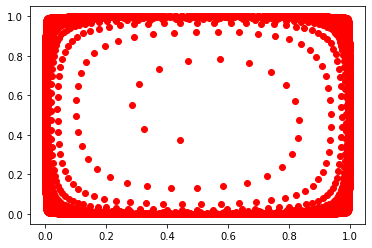

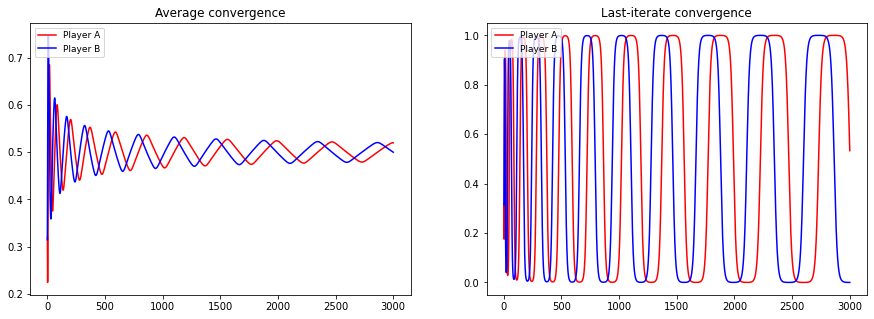

In [ ]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = (MWU(M_a, M_b, compute_epsilon, T = 3000))
#print(one_avg_conv_a)
#print(one_avg_conv_b)
#print(one_last_conv_a)
#print(one_last_conv_b)

#This plot represents the avg probability that the players choose "Heads"
plt.figure()
plt.plot(avg_conv_a, avg_conv_b, 'ro')


#This plot represents the probabiltiy, at each iteration, that a person picks "Heads"
plt.figure()
plt.plot(last_conv_a, last_conv_b, 'ro')

plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))

#### Question (b) - Rock-paper-scissors game

Thus, our probabilities that we graph represent the average and the last convergence of the probability that we choose the 0th index option-rock. We expect a convergence to 1/3.

In [ ]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

This converges, as expected, to 1/3.

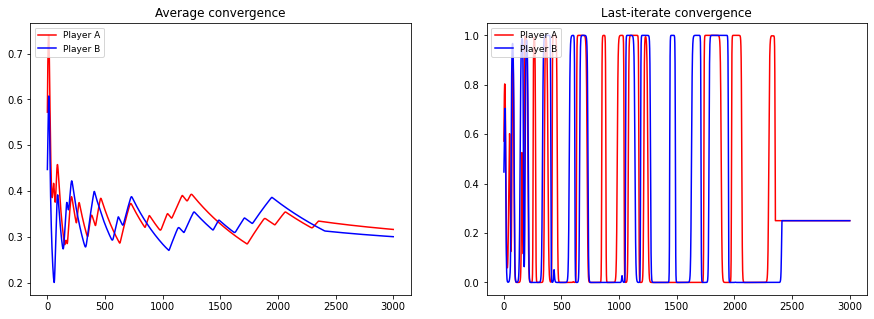

In [ ]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
avg_a, avg_b, last_a, last_b = MWU(M_a, M_b, compute_epsilon)
#print("Avg a: ", avg_a)
#print("Avg b: ", avg_b)
#print("Last a: ", last_a)
#print("Last b: ", last_b)

#avg_a_heads, avg_a_tails, avg_b_heads, avg_b_tails, last_a_heads, last_a_tails, last_b_heads, last_b_tails = getArraysForPlotting(avg_a, avg_b, last_a, last_b)

#plt.plot(avg_a_heads, avg_b_heads)

plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))


**Choice 2: epsilon = 1/t**

This does not converge as expected to 1/3

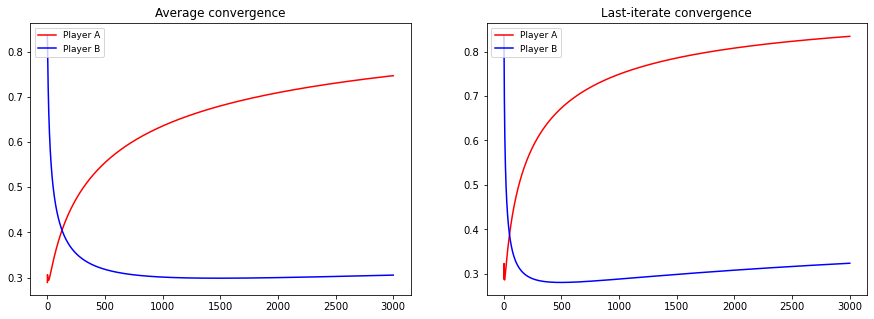

In [ ]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))

**Choice 3: epsilon = 1/(t^2/3)**

This converges to 1/3

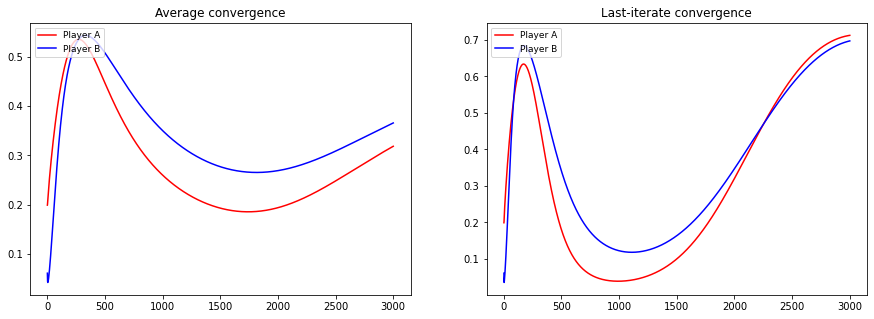

In [ ]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))

**Choice 4: 1/sqrt(t)**

This converges to 1/3

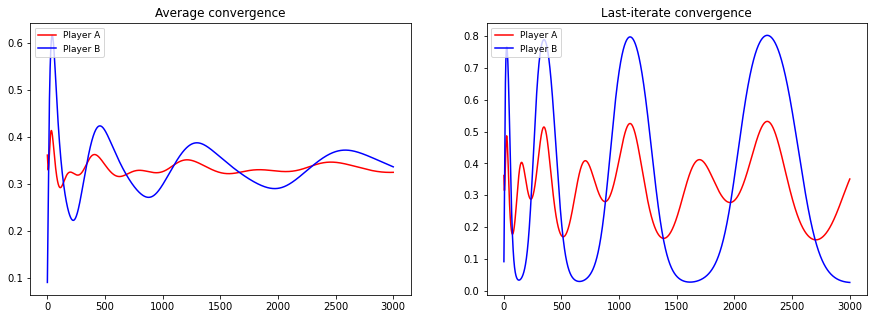

In [ ]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))

**Choice 5: epsilon = 1/(t^(1/3))**

This converges to 1/3

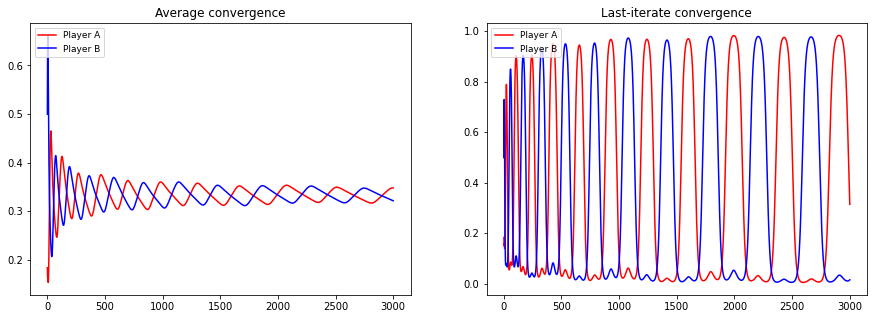

In [ ]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000))

#### Question (c)

Our implementation for the DIR game. We expect a convergence to 1 for (k,K) as it provides the most utility to BOTH parties. Thus, since our representation of the probabilities graphed are for the 0th index choice (representing the 1st action of k), we expect to see a convergence to 0 for this first action.

---



In [ ]:
# A function template to construct payoff matrices for the DIR game
# You DO NOT have to use this template
#k,k
def construct_DIR(K, c):
    rho = max(K, c)
    M_a = np.zeros((K, K))
    M_b = np.zeros((K, K))
    
    for i in range(K):
        for j in range(K):
            if i <= (j+1):
              # utility for A is i/p
              M_a[i][j] = (i+1)/rho
            else:
              # utility for A is -c/p
              M_a[i][j] = -c/rho
            if j <= i:
              # utility for B is j/p
              M_b[i][j] = (j+1)/rho
            else:
              # utility for B is -c/p
              M_b[i][j] = -c/rho
    return -M_a, -M_b

In [ ]:
#Here, we print the payoff Matrix for DIR(4,8)

#This is the payoff Matrix for player A
print(construct_DIR(4,8)[0])

#This is the payoff Matrix for player B
print(construct_DIR(4,8)[1])

[[-0.125 -0.125 -0.125 -0.125]
 [-0.25  -0.25  -0.25  -0.25 ]
 [ 1.    -0.375 -0.375 -0.375]
 [ 1.     1.    -0.5   -0.5  ]]
[[-0.125  1.     1.     1.   ]
 [-0.125 -0.25   1.     1.   ]
 [-0.125 -0.25  -0.375  1.   ]
 [-0.125 -0.25  -0.375 -0.5  ]]


In [ ]:
#This plotting is specifically and only for the DIR
time = list(range(1,3001))
stringlist_of_dir=['DIR(4,8)', 'DIR(4,16)', 'DIR(10,15)', 'DIR(10,30)']
def plotting(average_a, average_b, latest_a, latest_b, title_string):
  
  figure, axis = plt.subplots(1,2,figsize=(15,5))

  axis[0].plot(time, average_a, label="Player A", color="red")
  axis[0].plot(time, average_b, label="Player B", color="blue")
  axis[0].legend(loc='upper left', prop={'size':9})
  axis[0].set_title("Average convergence")

  axis[1].plot(time, latest_a, label="Player A", color="red")
  axis[1].plot(time, latest_b, label="Player B", color="blue")
  axis[1].legend(loc='upper left', prop={'size':9})
  axis[1].set_title("Last-iterate convergence")
  figure.suptitle(title_string)

**Choice 1: epsilon = 1/2**

This converges, as expected, to 0 except for DIR(10,30)

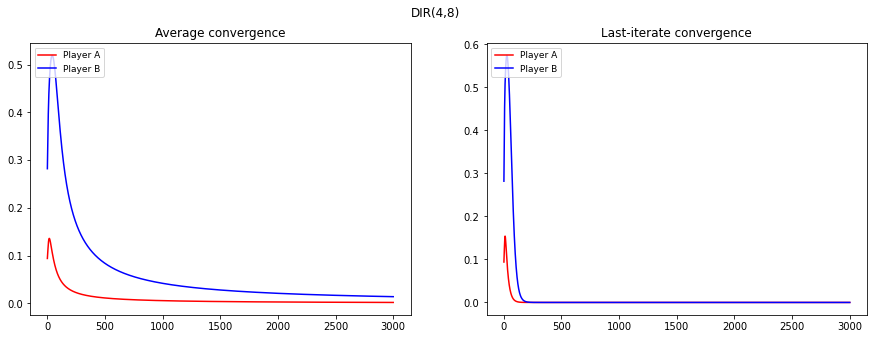

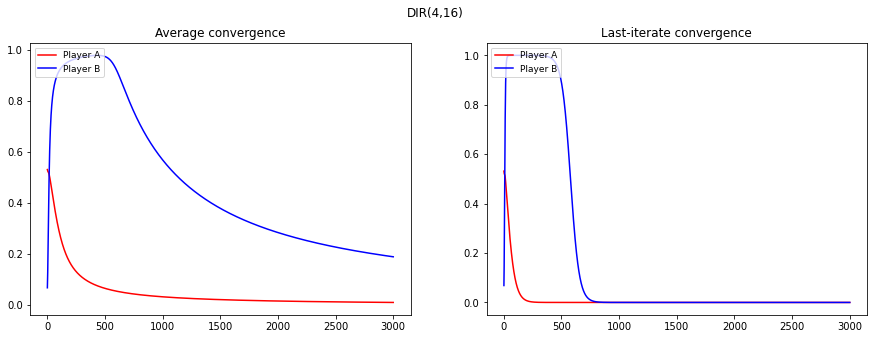

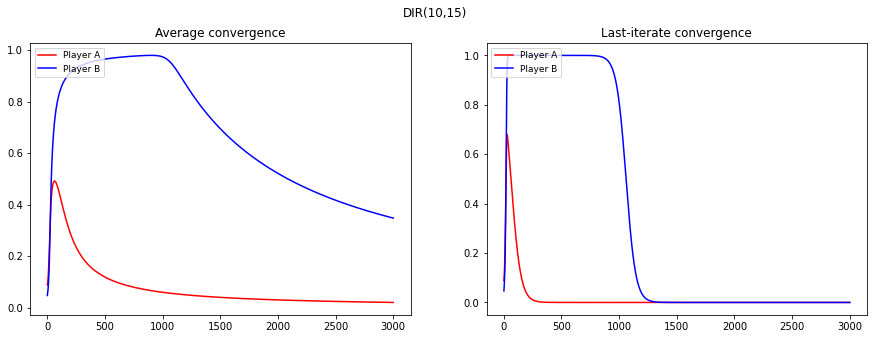

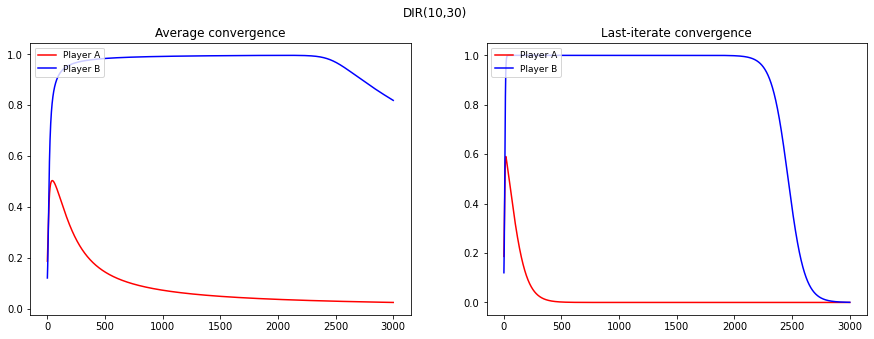

In [ ]:
# Choice 1: epsilon = 1/2, DIR(4,8)
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])

**Choice 2: epsilon = 1/t**

These do not converge to 0.

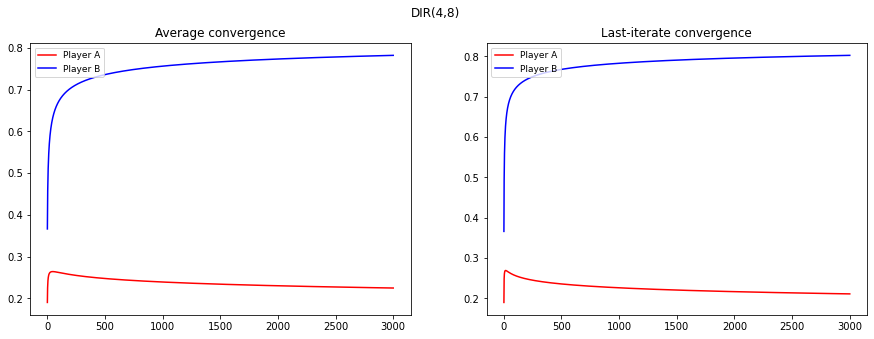

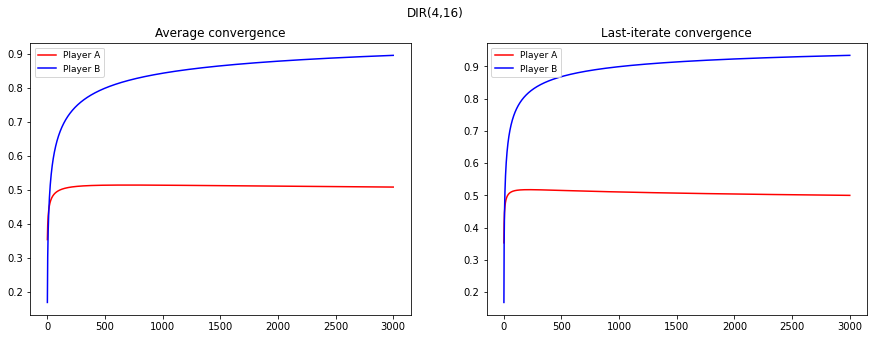

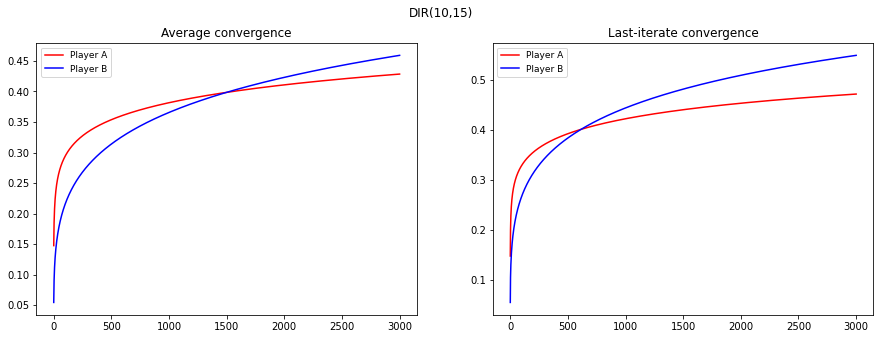

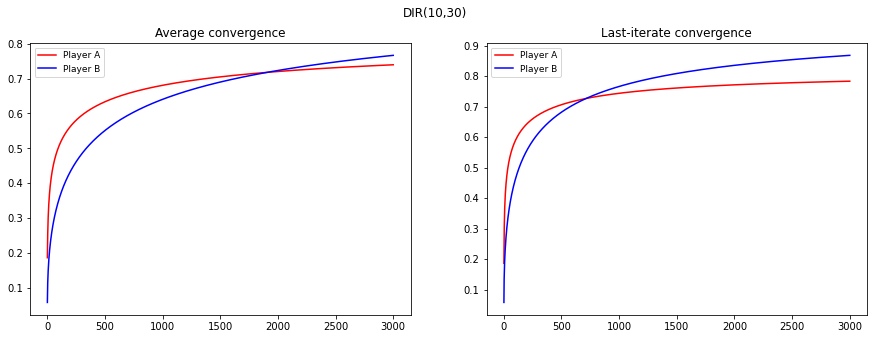

In [ ]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])

**Choice 3: epsilon = 1/(t^2/3)**

These do not converge.

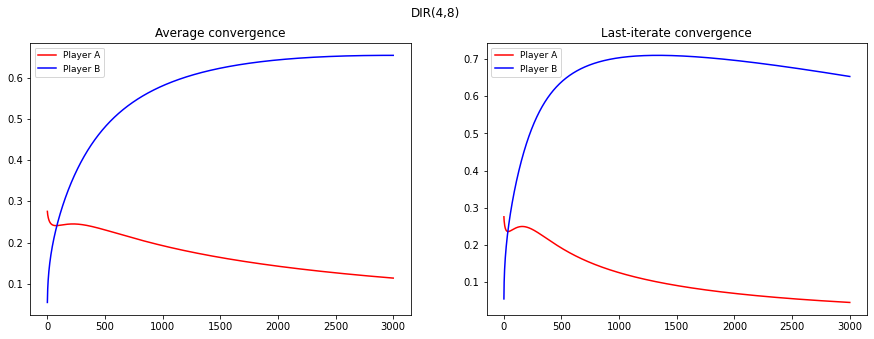

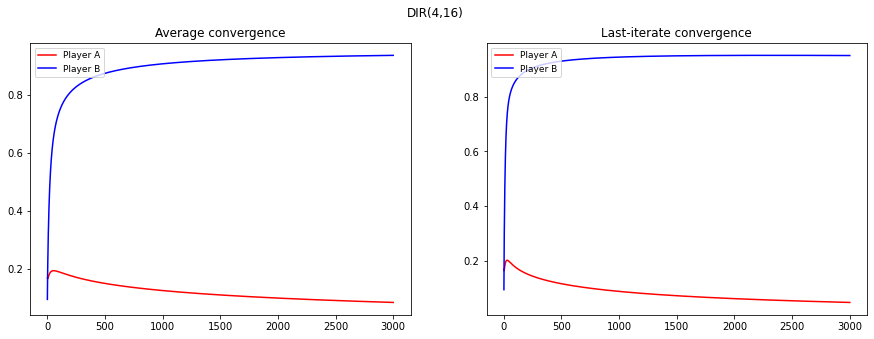

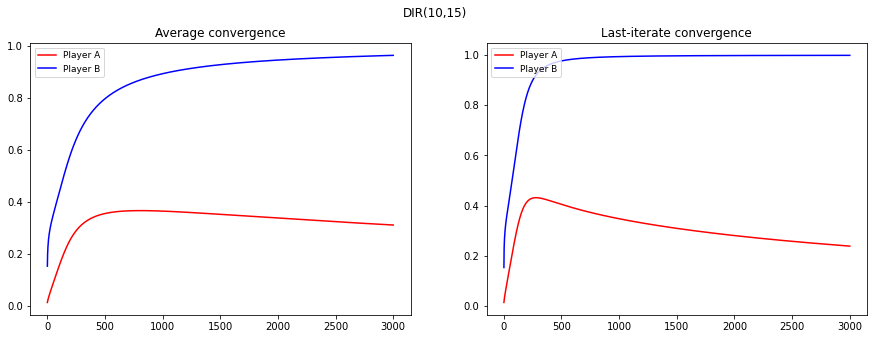

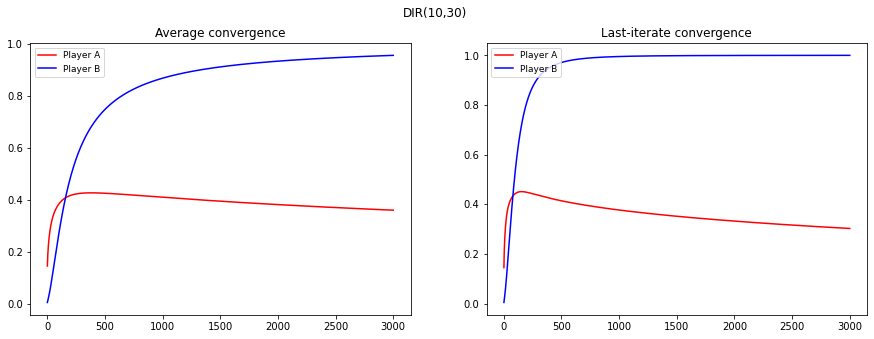

In [ ]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])

**Choice 4: 1/sqrt(t)**

These do not converge.

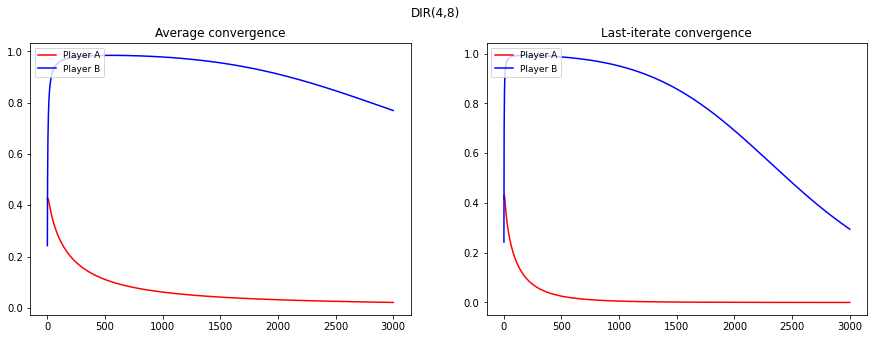

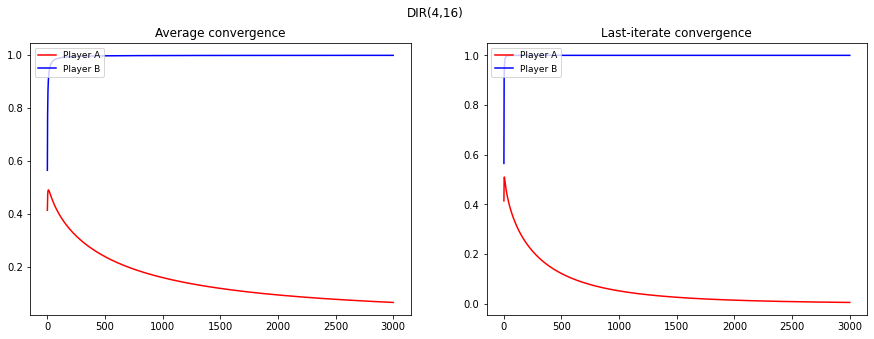

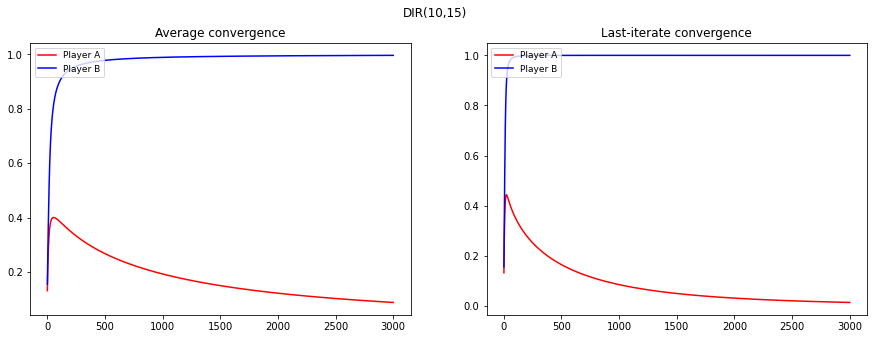

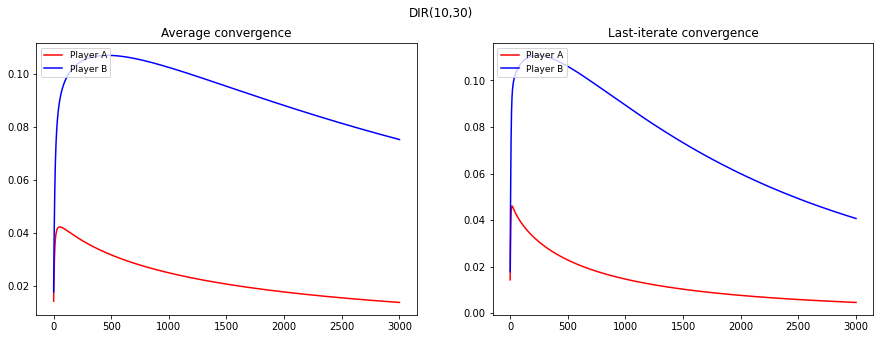

In [ ]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])

**Choice 5: epsilon = 1/(t^(1/3))**

These do not converge.

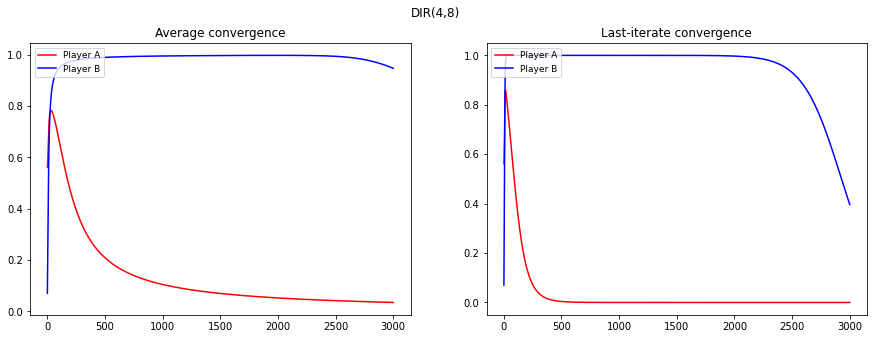

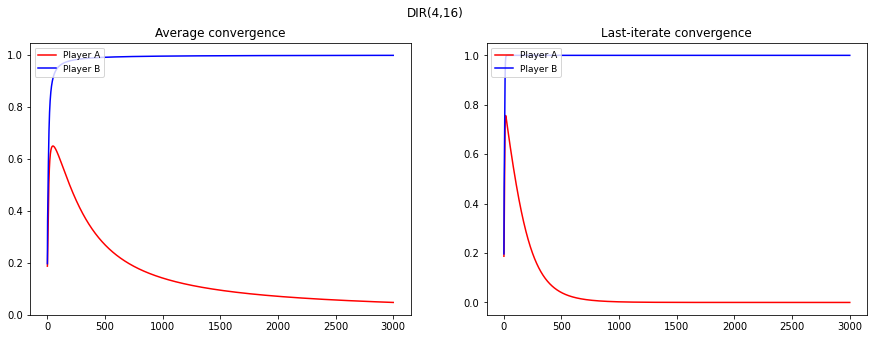

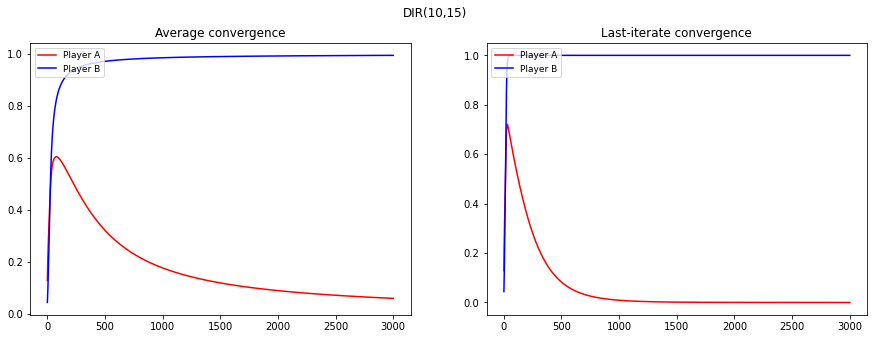

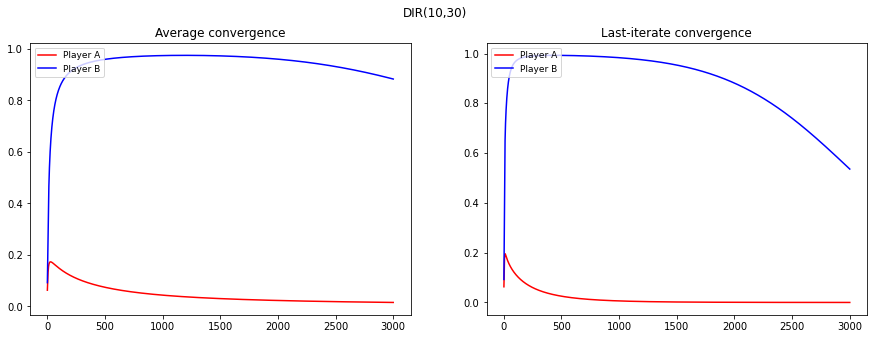

In [ ]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*MWU(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])

### Task II: Uncoupled No-Regret Learning Dynamics under Bandit Information

We pick an action for each player from our created draw() function, which picks an index from the passed strategy matrix (our normalized weight matrix) of floats proportionally to the size of the matrix's entries (i.e. normalize to a probability distribution and draw according to the probabilities).

Then, once we have determined each player's actions, we calculate the payoff for each player (based on each other's actions). 
We update the weights we multiply w_a (weight matrix) by e^(-epsilon*c_t(i)), where c_t(i) is our cost vector which is = transpose of [0 0 0 0 .. c_t(i)/p_t(i) .. 0 0 0 0] where c_t(i) can only be non-zero for index i. To maintain a Bandit Information setup, we do not inform either player of each other's actions, just the result at each t in T; such that the c_t only gives information of the choice at index i.



In [ ]:
import math
# An example template of the Multiplicative Weight Update Algorithm. 
# You DO NOT have to use this template

# ------- EXP3 Algorithm -------#
def EXP3(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (not using dict here :-D ):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """
    
    # The number of strategies
    k = M_a.shape[0]
    
    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.array([random.uniform(0, 1) for _ in range(k)])
    w_b = np.array([random.uniform(0, 1) for _ in range(k)])
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = [], [], [], []
    
    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0

    
    # The game starts
    for t in range(T):
       
        strategy_b = w_b / np.sum(w_b)
        strategy_a = w_a / np.sum(w_a)

        sum_p_a += 1
        sum_p_b += 1

        #we define this as the probability that the chosen player plays "Heads"
        last_conv_a.append(strategy_a[0])
        last_conv_b.append(strategy_b[0])

        avg_conv_a.append(sum(last_conv_a)/len(last_conv_a))
        avg_conv_b.append(sum(last_conv_b)/len(last_conv_b))

        
        # ---------- Fill out the details --------------# 
        # Simple matrix operations can be used here

        cost_a = np.matmul(M_a, strategy_b)
        cost_b = np.matmul(np.transpose(M_b), strategy_a)
        
        #Normalization of cost vector
        cost_a = (cost_a + -M_a.min() + np.ones((k, )) )/(-M_a.min() + M_a.max())
        cost_b = (cost_b + -M_b.min() + np.ones((k, )) )/(-M_b.min() + M_b.max())

        #Update weight
        # Compute epsilon
        epsilon = compute_epsilon(t)

        #instead of multiplying w_a by 1-epsilon*cost_a
        #we need to multiply w_a by e^(-epsilon*c_t(i))
        #where c_t(i) = transpose of [0 0 0 0 .. c_t(i)/p_t(i) .. 0 0 0 0]

         #call draw which will represent us picking an arm i with probability w_t(i)/W_t (strategy variable)
         #this choice is either heads or tails for each player
        choice_a = draw(strategy_a)
        #print("INDEX CHOICEA :", choice_a)

        choice_b = draw(strategy_b)
        #print("INDEX CHOICEB :", choice_b)

        payoff_a = M_a[choice_a][choice_b]
        payoff_b = np.transpose(M_b)[choice_b][choice_a]

       # print("PAY:A: ",payoff_a)


        # choice_aa = draw(w_a)
        # print(choice_aa)

        #print("COST A:", cost_a)
        #print("COST B:", cost_a)

       # print("Pa:",strategy_a)
        #print("Pb:",strategy_b)
        #set up our cost vector of just zeros
        c_t_a = np.zeros((k,))
        c_t_b = np.zeros((k, ))
        
        #fill in ONLY the index of the choice with c_t(i)/p_t(i) 
        c_t_a[choice_a] = payoff_a/strategy_a[choice_a]
        c_t_b[choice_b] = payoff_b/strategy_b[choice_b]

        #take the transpose
        c_t_a = np.transpose(c_t_a)
        c_t_b = np.transpose(c_t_b)

       # print(c_t_a)

        #update the weight values according to the formula: e^(-epsilon*c_t(i))
        w_a = np.multiply(w_a, np.exp(-epsilon*c_t_a))
        w_b = np.multiply(w_b, np.exp(-epsilon*c_t_b))


    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

In [ ]:
#From TA Project 2 Tutorial:
time = list(range(1,3001))
def plotting(average_a, average_b, latest_a, latest_b):
  figure, axis = plt.subplots(1,2,figsize=(15,5))

  axis[0].plot(time, average_a, label="Player A", color="red")
  axis[0].plot(time, average_b, label="Player B", color="blue")
  axis[0].legend(loc='upper left', prop={'size':9})
  axis[0].set_title("Average convergence")

  axis[1].plot(time, latest_a, label="Player A", color="red")
  axis[1].plot(time, latest_b, label="Player B", color="blue")
  axis[1].legend(loc='upper left', prop={'size':9})
  axis[1].set_title("Last-iterate convergence")


In [ ]:
#EX: chosen_index_a = draw(w_a)

# Draw = float -> int
# pick an index from the given list of floats proportionally
# to the size of the entry (i.e. normalize to a probability
# distribution and draw according to the probabilities).

def draw(weights_matrix):
    choice = random.uniform(0, sum(weights_matrix))
    choiceIndex = 0

    for weight in weights_matrix:
        choice -= weight
        if choice <= 0:
            return choiceIndex

        choiceIndex += 1

#### Question (a) - Pennies game

In [ ]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])

**Choice 1: epsilon = 1/2**

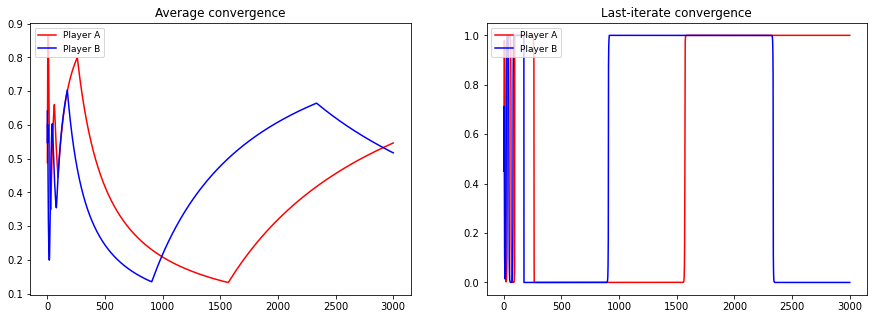

In [ ]:
 # Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


**Choice 2: epsilon = 1/t**

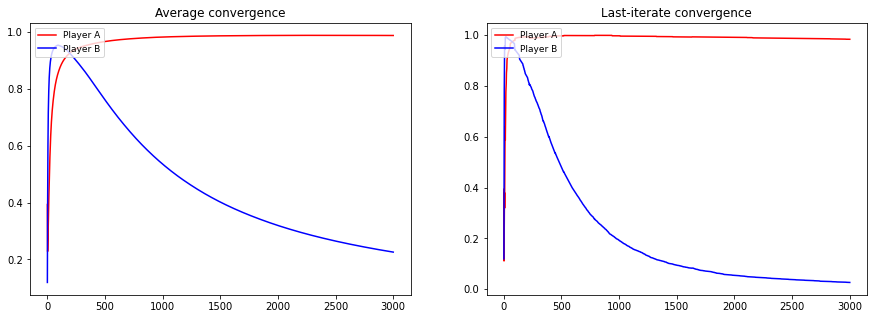

In [ ]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


**Choice 3: epsilon = 1/(t^2/3)**

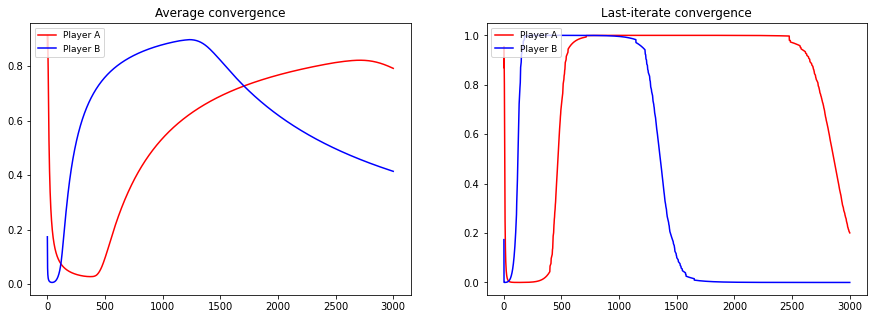

In [ ]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


**Choice 4: 1/sqrt(t)**

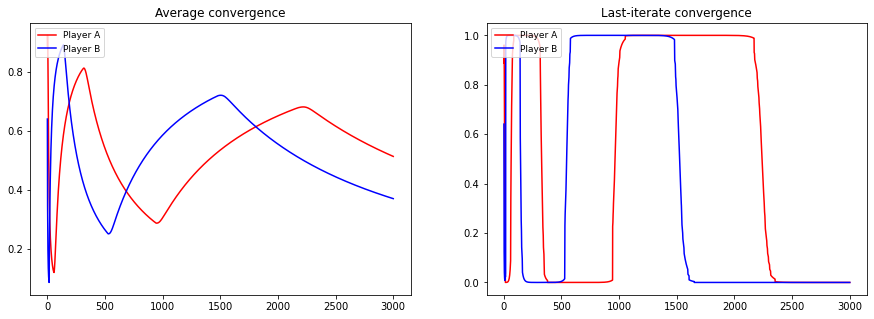

In [ ]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


**Choice 5: epsilon = 1/(t^(1/3))**

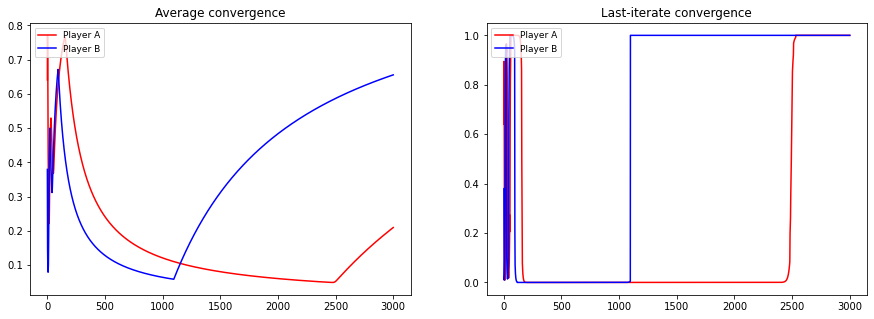

In [ ]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


#### Question (b) - Rock-paper-scissors game

In [ ]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

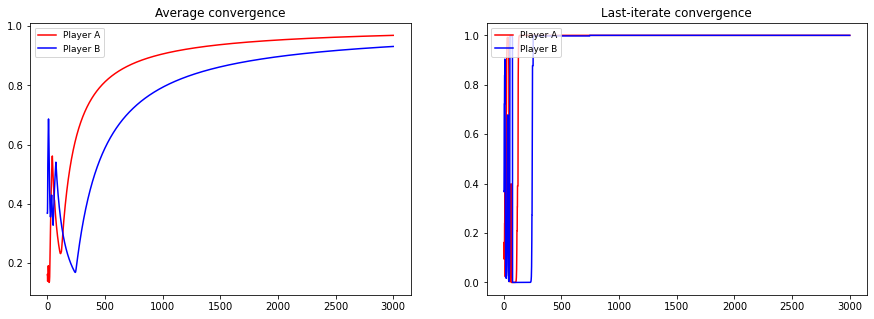

In [ ]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


**Choice 2: epsilon = 1/t**

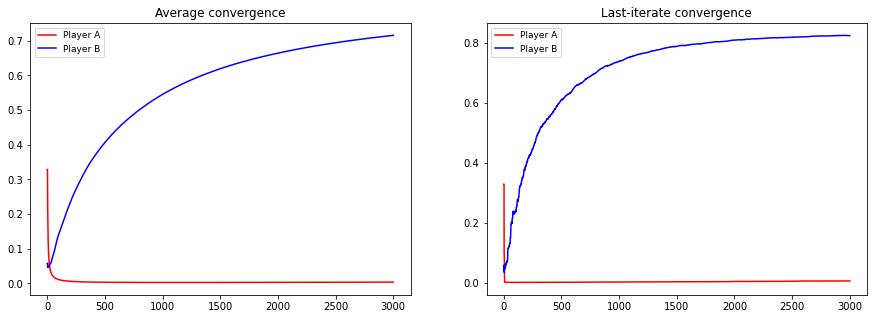

In [ ]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


**Choice 3: epsilon = 1/(t^2/3)**

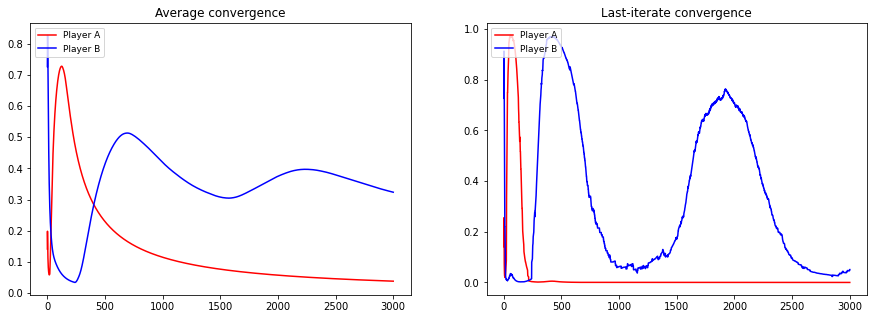

In [ ]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


**Choice 4: 1/sqrt(t)**

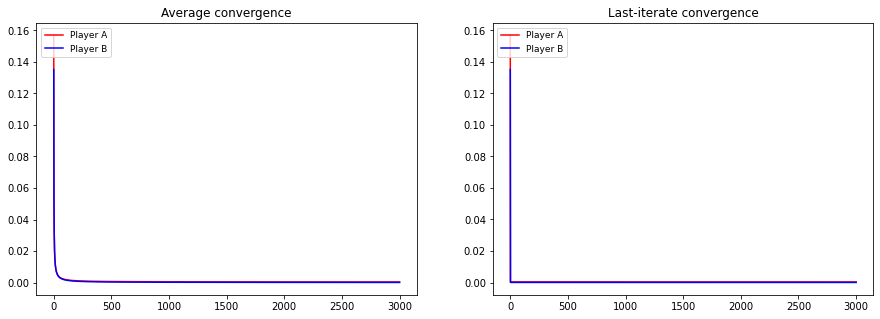

In [ ]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


**Choice 5: epsilon = 1/(t^(1/3))**

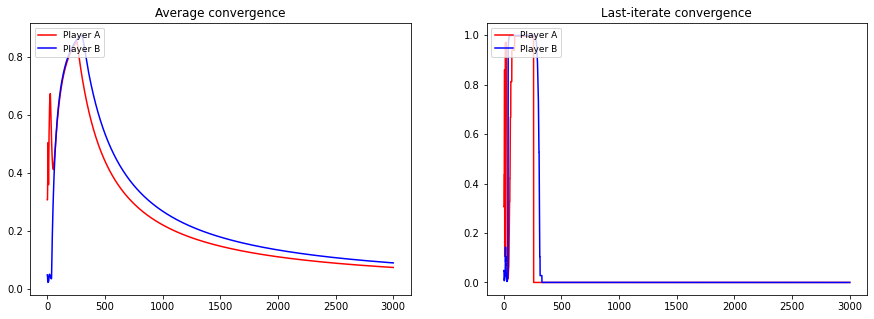

In [ ]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000))


Question (c) - Diamond in Rough game

In [ ]:
#This plotting is specifically and only for the DIR
time = list(range(1,3001))
stringlist_of_dir=['DIR(4,8)', 'DIR(4,16)', 'DIR(10,15)', 'DIR(10,30)']
def plotting(average_a, average_b, latest_a, latest_b, title_string):
  
  figure, axis = plt.subplots(1,2,figsize=(15,5))

  axis[0].plot(time, average_a, label="Player A", color="red")
  axis[0].plot(time, average_b, label="Player B", color="blue")
  axis[0].legend(loc='upper left', prop={'size':9})
  axis[0].set_title("Average convergence")

  axis[1].plot(time, latest_a, label="Player A", color="red")
  axis[1].plot(time, latest_b, label="Player B", color="blue")
  axis[1].legend(loc='upper left', prop={'size':9})
  axis[1].set_title("Last-iterate convergence")
  figure.suptitle(title_string)

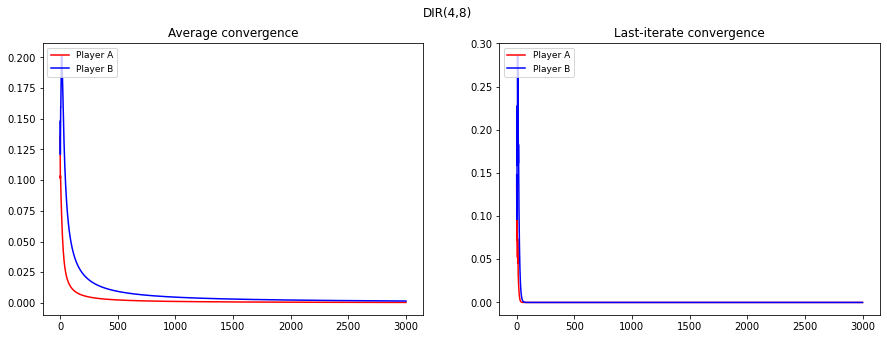

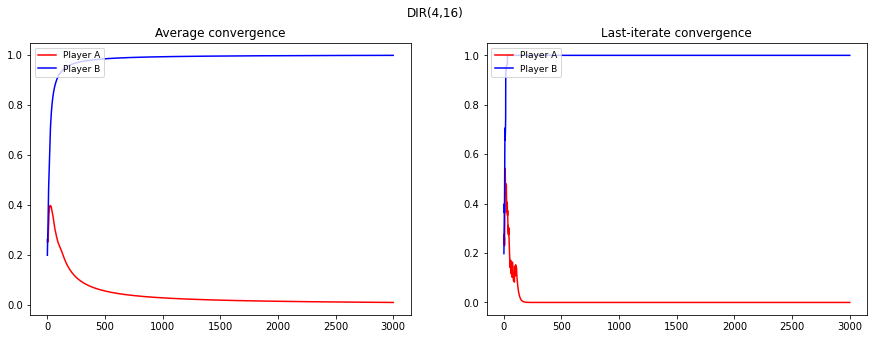

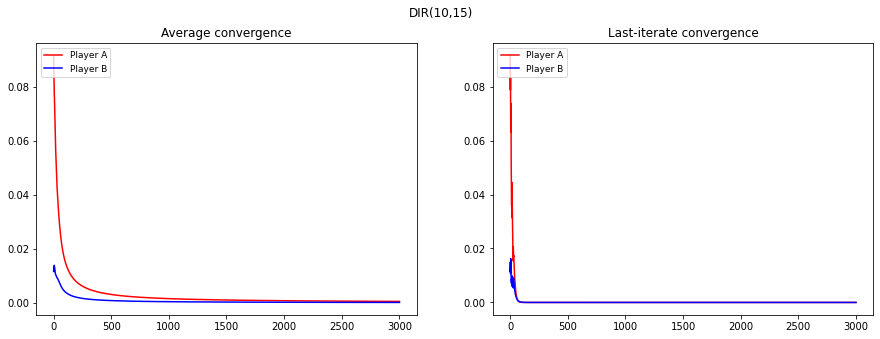

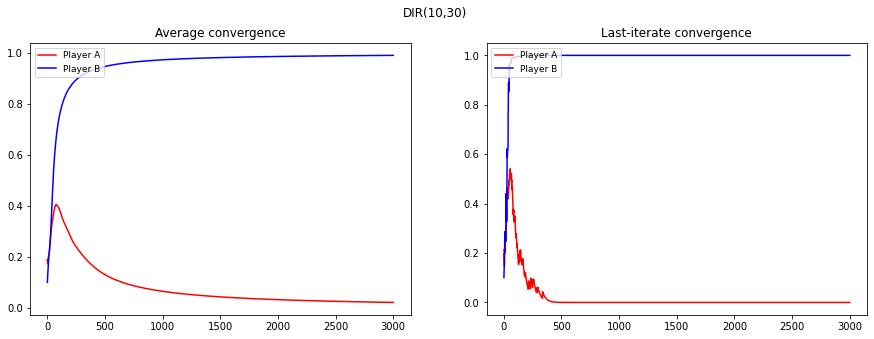

In [ ]:
# Choice 1: epsilon = 1/2, DIR(4,8)
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])

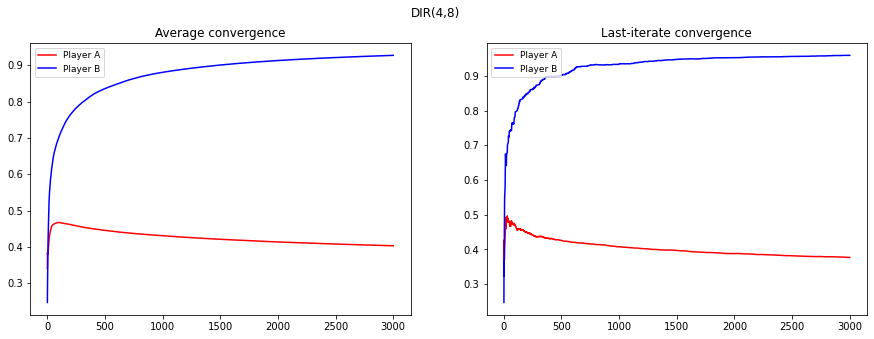

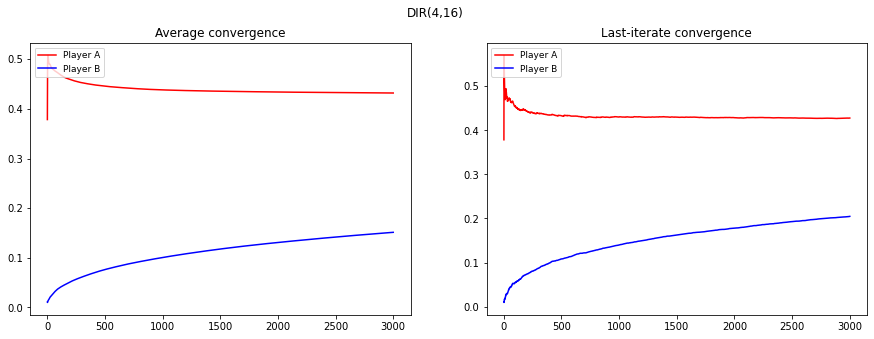

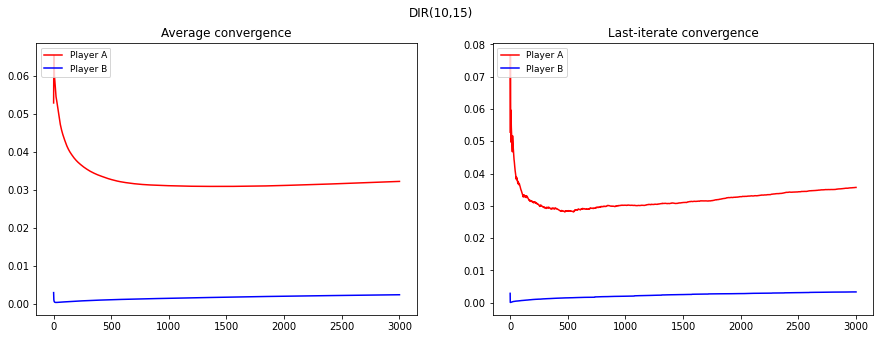

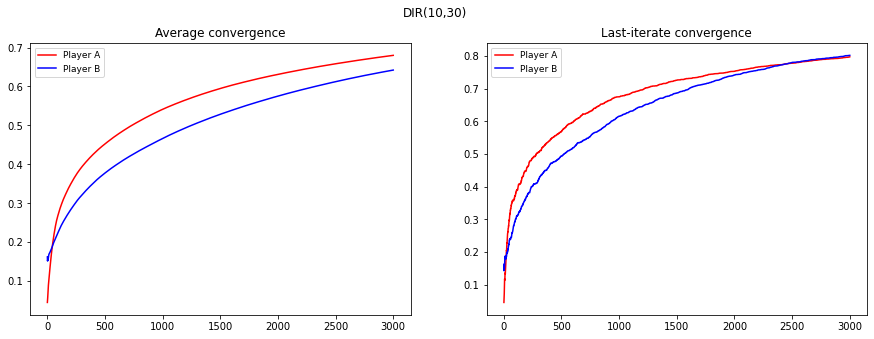

In [ ]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])

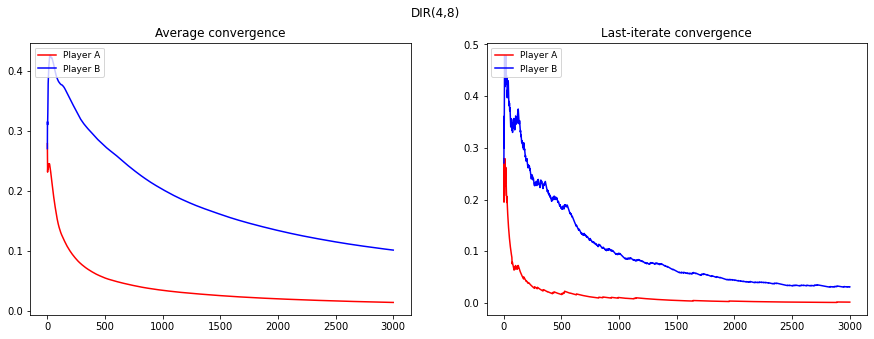

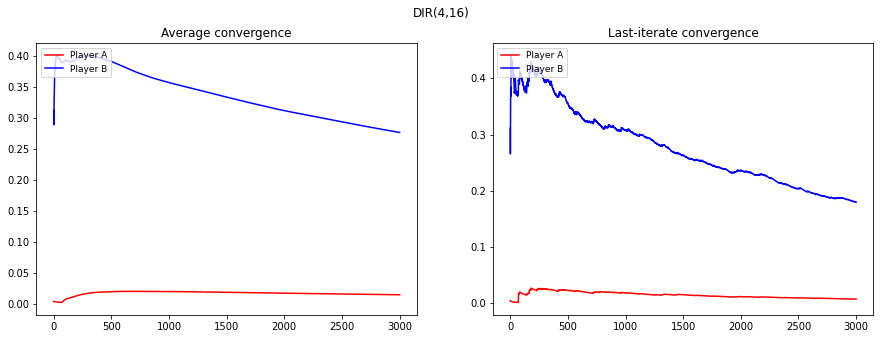

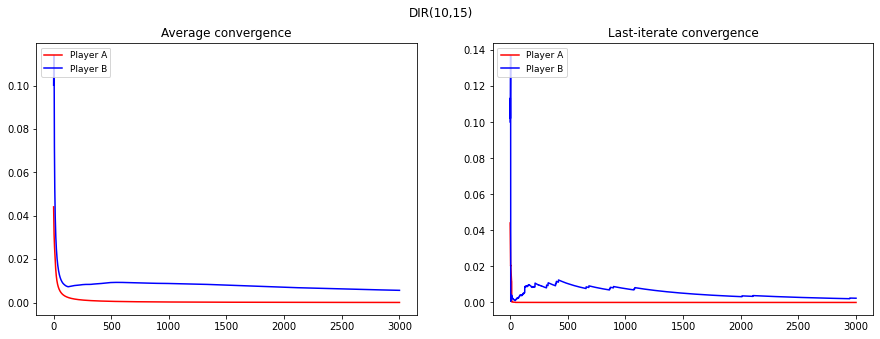

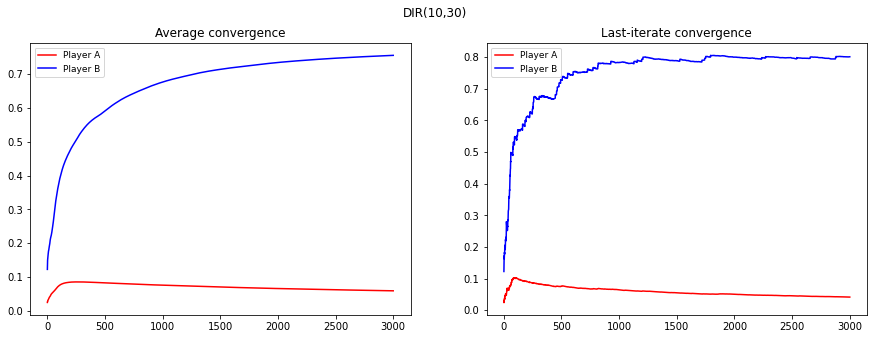

In [ ]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])

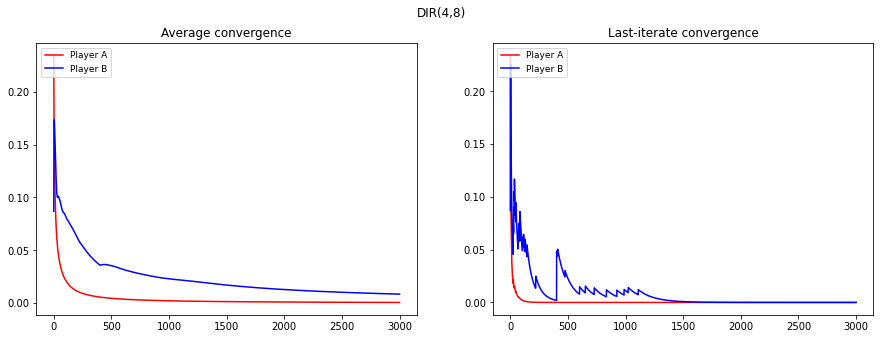

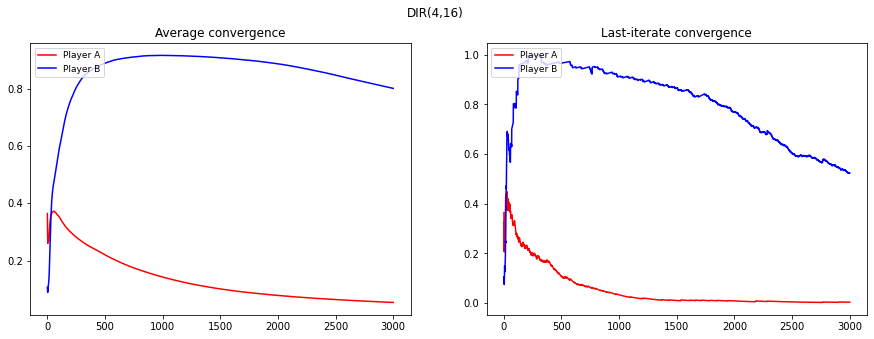

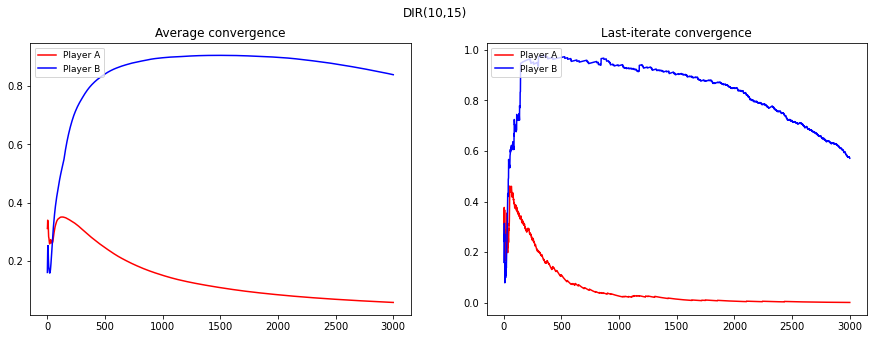

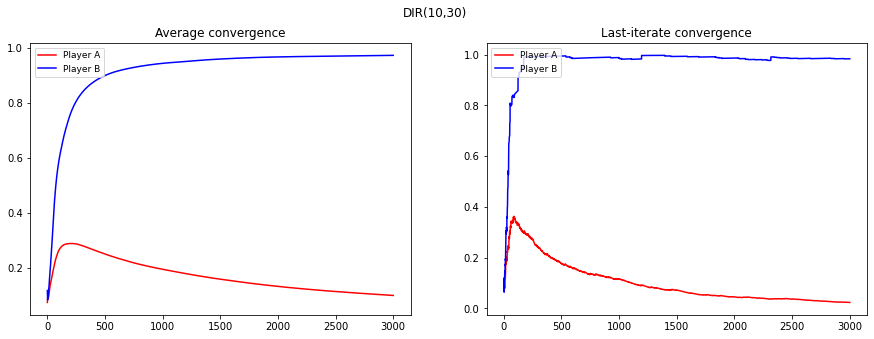

In [ ]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])

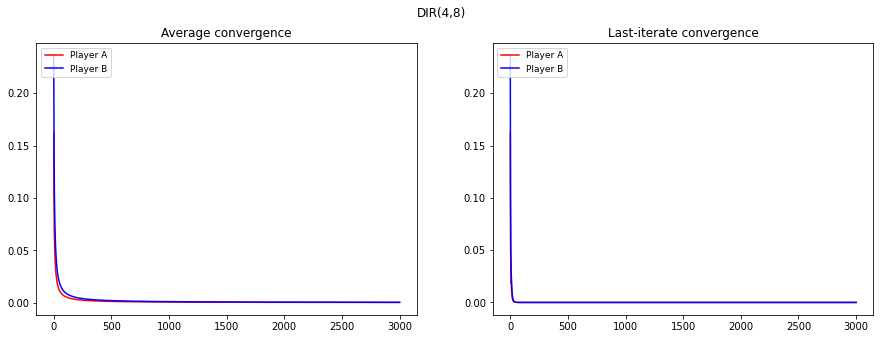

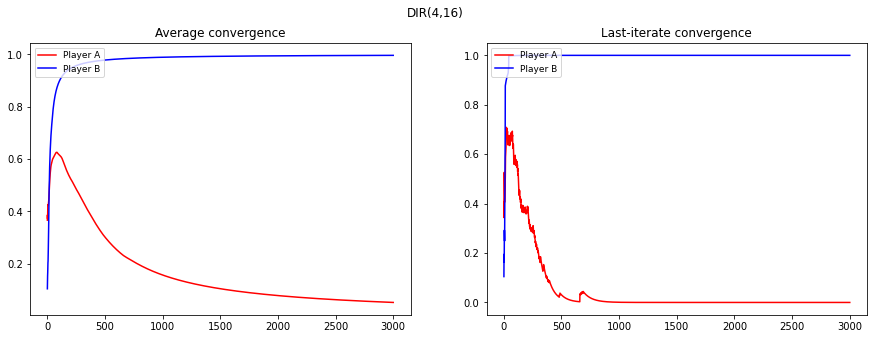

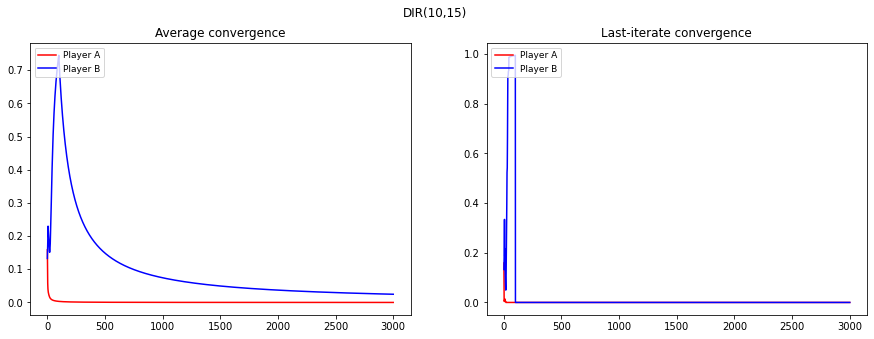

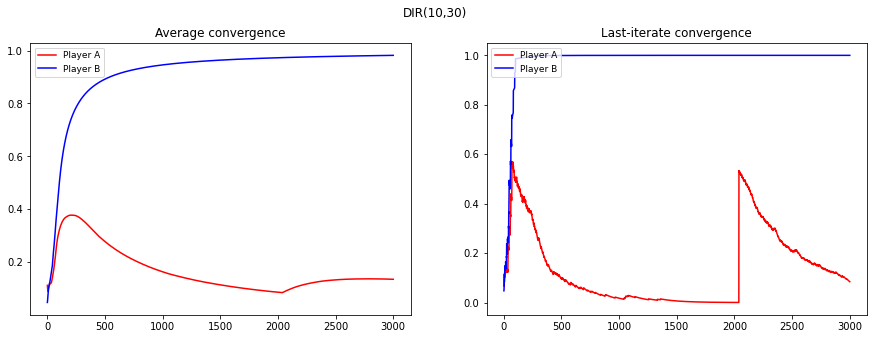

In [ ]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
M_a, M_b = construct_DIR(4,8)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[0])
M_a, M_b = construct_DIR(4,16)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[1])
M_a, M_b = construct_DIR(10,15)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[2])
M_a, M_b = construct_DIR(10,30)
plotting(*EXP3(M_a, M_b, compute_epsilon, T = 3000),stringlist_of_dir[3])